In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
import numpy as np

# Quantum Teleportation Protocol: Initial Steps

This code implements the **first half of the quantum teleportation protocol**, which facilitates the transfer of an arbitrary quantum state from one qubit to another using entanglement and classical communication. Below is a summary of the steps implemented in this code:

1. **Setup**:
   - Define quantum registers:
     - `qubit`: Contains the quantum state to be teleported.
     - `ebit0` and `ebit1`: Form an entangled EPR pair (shared between sender and receiver).
   - Define classical registers:
     - `a` and `b`: Store the measurement results for classical communication.

2. **Entanglement Creation**:
   - Apply a **Hadamard gate** and **CNOT gate** to create an entangled EPR pair between `ebit0` (sender's qubit) and `ebit1` (receiver's qubit).

3. **Entangling the Qubit to Teleport**:
   - Entangle the qubit to teleport (`qubit`) with the first qubit of the EPR pair (`ebit0`) using a **CNOT gate** and a **Hadamard gate**.

4. **Barriers**:
   - Used to visually separate the logical steps of the teleportation protocol.

The output of this code prepares the quantum system for the next steps of the teleportation protocol, which involve measurements and classical communication.

**Note**: The receiver's corrections and the final reconstruction of the quantum state are not implemented here.


In [2]:
qubit = QuantumRegister(1,'Q')
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')

a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

protocol = QuantumCircuit(qubit,ebit0,ebit1,a,b)

protocol.h(ebit0)
protocol.cx(ebit0,ebit1)
protocol.barrier()

protocol.cx(qubit,ebit0)
protocol.h(qubit)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

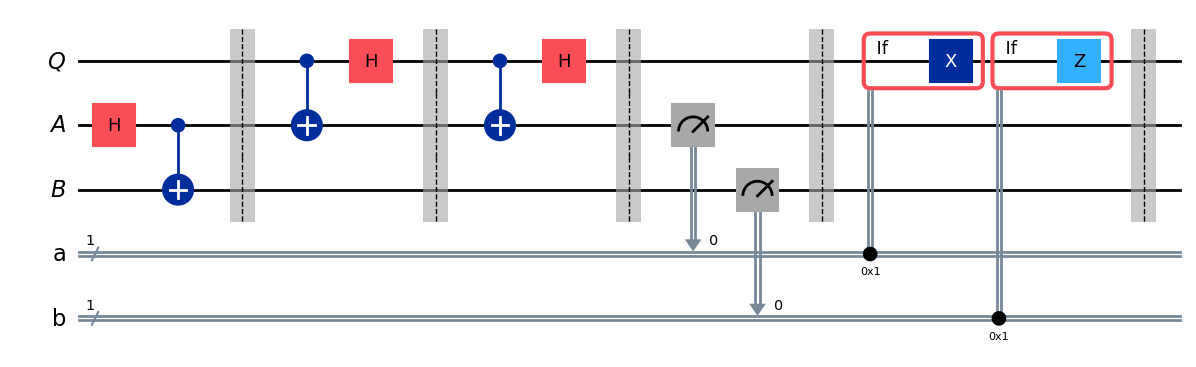

In [3]:
protocol.cx(qubit,ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0,a)
protocol.measure(ebit1,b)
protocol.barrier()

with protocol.if_test((a,1)):
    protocol.x(qubit)
with protocol.if_test((b,1)):
    protocol.z(qubit)

protocol.barrier()

protocol.draw(output='mpl')

# Random Unitary Gate

This code creates a **random single-qubit unitary gate** (`UGate`) by generating random values for its parameters. The unitary matrix representation of the gate is displayed using the `to_matrix` method.

**Key Points**:
- `UGate` represents a general single-qubit unitary operation.
- The parameters define the gate's rotation on the Bloch sphere.
- Randomization ensures a unique transformation for every execution.
2

In [4]:
random_gate = UGate(
    theta = random.random() * 2 * np.pi,
    phi = random.random() * 2 * np.pi,
    lam = random.random() * 2 * np.pi

)

display(random_gate.to_matrix)

<bound method Gate.to_matrix of Instruction(name='u', num_qubits=1, num_clbits=0, params=[2.2415554067267336, 3.0506688978439875, 2.290173914633883])>

In [5]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate, [qubit])
test.barrier()

test = test.compose(protocol)
test.barrier()

test.append(random_gate.inverse(), ebit1)

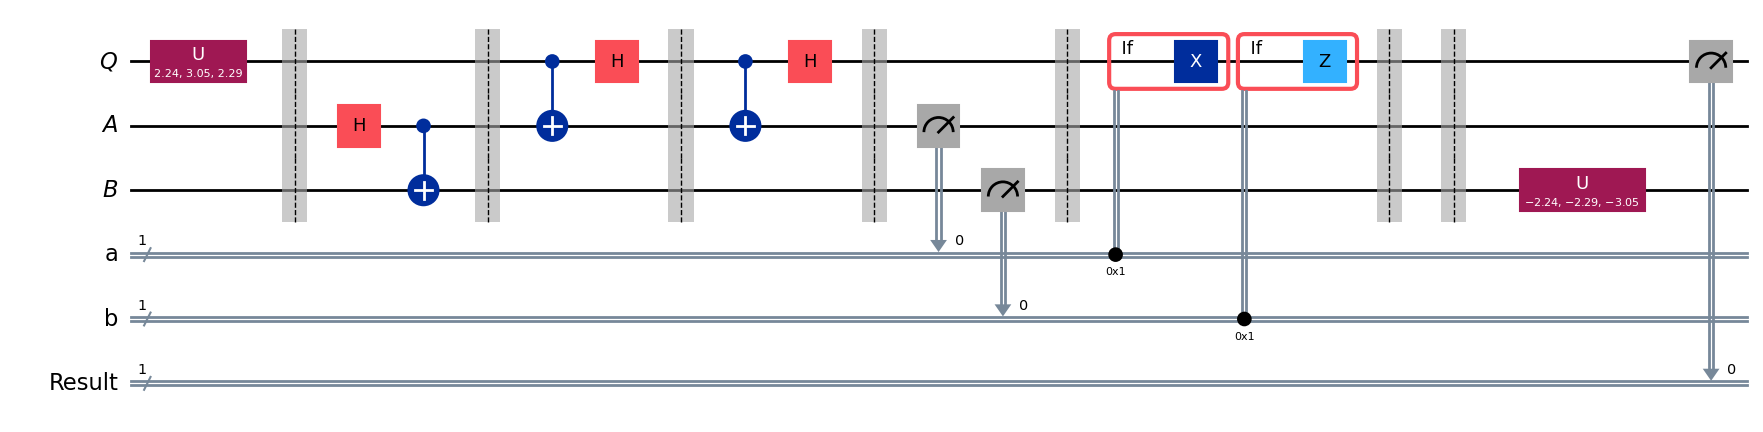

In [6]:
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(qubit, result)

display(test.draw(output='mpl'))

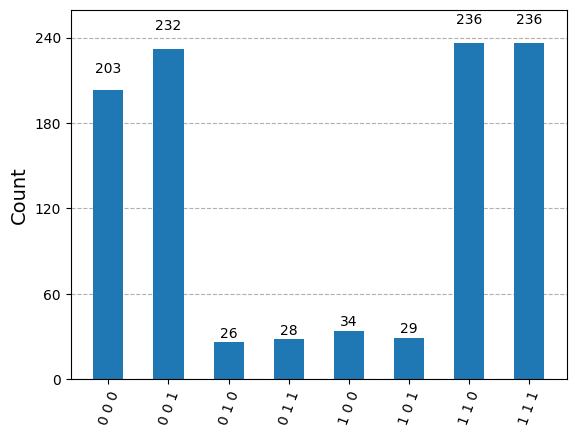

In [8]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

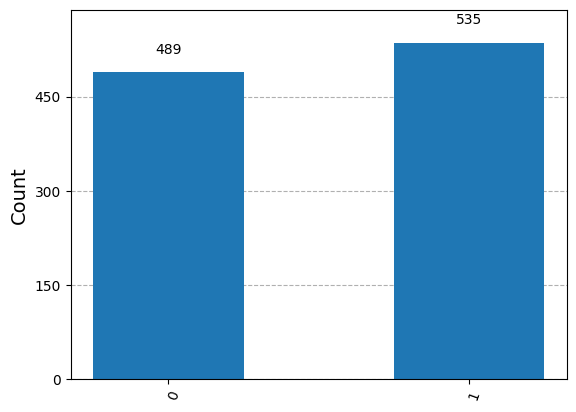

In [9]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))